(60000, 28, 28)
[5 0 4 1 9]
(10000, 28, 28)


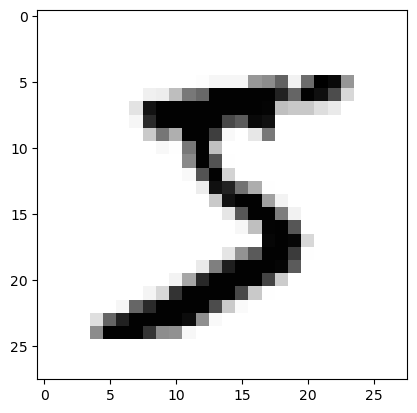

In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf

(train_images, train_labels), (test_images, test_labels)=tf.keras.datasets.mnist.load_data()

print(train_images.shape)
print(train_labels[:5])
print(test_images.shape)

plt.imshow(train_images[0], cmap="Greys")

In [16]:
train_images=train_images.reshape((60000, 784))
train_images=train_images.astype('float32')/255.0

test_images=test_images.reshape((10000, 784))
test_iamges=test_images.astype('float32')/255.0

print(train_images.shape)
print(train_labels[:5])
print(test_images.shape)

(60000, 784)
[5 0 4 1 9]
(10000, 784)


In [17]:
print(train_labels[0])
train_labels=tf.keras.utils.to_categorical(train_labels)
test_labels=tf.keras.utils.to_categorical(test_labels)

print(train_labels[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [19]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
from keras.callbacks import EarlyStopping

inputs = Input(shape=(784,))
hidden1 = Dense(512, activation='relu')(inputs)
output = Dense(10, activation='sigmoid')(hidden1)
model = Model(inputs=inputs, outputs=output)

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01), loss='mse', metrics=['accuracy'])
model.summary()
history=model.fit(train_images, train_labels
          , epochs=5, batch_size=128
          , validation_split=0.2)

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.2059 - loss: 0.0954 - val_accuracy: 0.5297 - val_loss: 0.0716
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6354 - loss: 0.0545 - val_accuracy: 0.9479 - val_loss: 0.0093
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9572 - loss: 0.0076 - val_accuracy: 0.9643 - val_loss: 0.0064
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0050 - val_accuracy: 0.9718 - val_loss: 0.0050
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.0036 - val_accuracy: 0.9743 - val_loss: 0.0044


In [20]:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print("테스트 정확도: ", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step - accuracy: 0.9603 - loss: 0.0063
테스트 정확도:  0.965399980545044


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9830 - loss: 0.0035
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9867 - loss: 0.0027
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9889 - loss: 0.0022
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9910 - loss: 0.0019
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0016


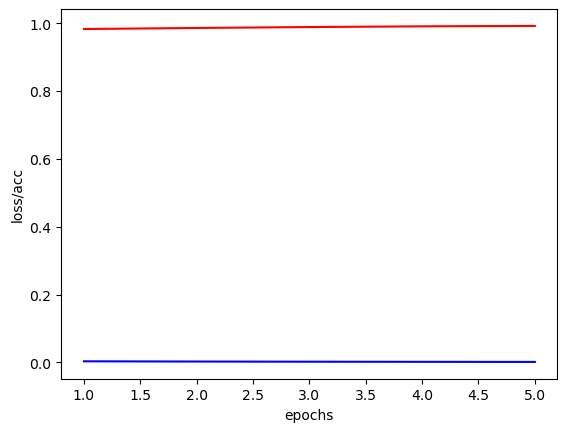

In [21]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)
loss=history.history['loss']
acc=history.history['accuracy']
epochs=range(1, len(loss)+1)

plt.plot(epochs, loss, 'b', label="Training Loss")
plt.plot(epochs, acc, 'r', label="Accuracy")
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()